In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import nbimporter
from functions import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import os
import subprocess

In [2]:
D7_dir='/home/mahdi/Desktop/data_selection_D7'
n,name=count(D7_dir)

out_dir='/home/mahdi/Desktop/valid'
n1,name1=count(out_dir)

In [3]:
o=np.zeros((81,3))
for i in range(n):
    x=(len(name[i][0][:])-7)
    data_dir='/media/mahdi/HD710 PRO/R&d/centerline/'+name1[i][0]+'/output/zero_ref/'+name[i][0][:x]+'_cplus.'+name[i][0][-6:]
    img = nib.load(data_dir)
    o[i,0]=img.shape[3]         
    o[i,1]=img.shape[2]  
    o[i,2]=name1[i][0]

In [7]:
osct=np.zeros((81,3))
for i in range(n):
    x=(len(name[i][0][:])-7)
    data_dir='/media/mahdi/HD710 PRO/R&d/valid/'+name1[i][0]+'/sct_seg/fmri_rmvol_moco.nii.gz'
    img = nib.load(data_dir)
    osct[i,0]=img.shape[3]         
    osct[i,1]=img.shape[2]  
    osct[i,2]=name1[i][0]

In [8]:
net_tx=np.zeros((81,328))
net_ty=np.zeros((81,328))
net_tz=np.zeros((81,328))

net_rx=np.zeros((81,328))
net_ry=np.zeros((81,328))
net_rz=np.zeros((81,328))

for subject in range (n):
    
    x=(len(name[subject][0][:])-7)
    d='/media/mahdi/HD710 PRO/R&d/centerline/'+name1[subject][0]+'/output/zero_ref/'+name[subject][0][:x]+'_cplus_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(o[subject,0])):
    
        t_x=movement[volume][0]
        t_y=movement[volume][1]
        t_z=movement[volume][2]
        
        r_x=movement[volume][3]
        r_y=movement[volume][4]
        r_z=movement[volume][5]
        
        net_rx[subject,volume]=r_x
        net_ry[subject,volume]=r_y
        net_rz[subject,volume]=r_z

        
        net_tx[subject,volume]=t_x
        net_ty[subject,volume]=t_y
        net_tz[subject,volume]=t_z

value_net_tx=[]
value_net_ty=[]
value_net_tz=[]
value_net_rx=[]
value_net_ry=[]
value_net_rz=[]




for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_tx.append(np.mean(net_tx[:,i]))  
    else:
        zero_net=np.count_nonzero(net_tx[:,i])
        value_net_tx.append(np.sum(net_tx[:,i])/(net_tx.shape[0]-zero_net))          
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_ty.append(np.mean(net_ty[:,i]))  
    else:
        zero_net=np.count_nonzero(net_ty[:,i])
        value_net_ty.append(np.sum(net_ty[:,i])/(net_ty.shape[0]-zero_net))         
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_tz.append(np.mean(net_tz[:,i]))  
    else:
        zero_net=np.count_nonzero(net_tz[:,i])
        value_net_tz.append(np.sum(net_tz[:,i])/(net_tz.shape[0]-zero_net))         
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_rx.append(np.mean(net_rx[:,i]))  
    else:
        zero_net=np.count_nonzero(net_rx[:,i])
        value_net_rx.append(np.sum(net_rx[:,i])/(net_rx.shape[0]-zero_net))   
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_ry.append(np.mean(net_ry[:,i]))  
    else:
        zero_net=np.count_nonzero(net_ry[:,i])
        value_net_ry.append(np.sum(net_ry[:,i])/(net_ry.shape[0]-zero_net)) 
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
        value_net_rz.append(np.mean(net_rz[:,i]))  
    else:
        zero_net=np.count_nonzero(net_rz[:,i])
        value_net_rz.append(np.sum(net_rz[:,i])/(net_rz.shape[0]-zero_net)) 


/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [9]:
sct_tx=np.zeros((81,328))
sct_ty=np.zeros((81,328))
sct_tz=np.zeros((81,328))

sct_rx=np.zeros((81,328))
sct_ry=np.zeros((81,328))
sct_rz=np.zeros((81,328))

for subject in range (n):
    
    x=(len(name[subject][0][:])-7)
    d='/media/mahdi/HD710 PRO/R&d/valid/'+name1[subject][0]+'/sct_seg/fmri_rmvol_moco_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(osct[subject,0])):
    
        t_x=movement[volume][0]
        t_y=movement[volume][1]
        t_z=movement[volume][2]
        
        r_x=movement[volume][3]
        r_y=movement[volume][4]
        r_z=movement[volume][5]
        
        sct_rx[subject,volume]=r_x
        sct_ry[subject,volume]=r_y
        sct_rz[subject,volume]=r_z

        sct_tx[subject,volume]=t_x
        sct_ty[subject,volume]=t_y
        sct_tz[subject,volume]=t_z

value_sct_tx=[]
value_sct_ty=[]
value_sct_tz=[]
value_sct_rx=[]
value_sct_ry=[]
value_sct_rz=[]

for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_tx.append(np.mean(sct_tx[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_tx[:,i])
        value_sct_tx.append(np.sum(sct_tx[:,i])/(sct_tx.shape[0]-zero_sct))          
        
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_ty.append(np.mean(sct_ty[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_ty[:,i])
        value_sct_ty.append(np.sum(sct_ty[:,i])/(sct_ty.shape[0]-zero_sct))      
        
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_tz.append(np.mean(sct_tz[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_tz[:,i])
        value_sct_tz.append(np.sum(sct_tz[:,i])/(sct_tz.shape[0]-zero_sct))  
        
        
        
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_rx.append(np.mean(sct_rx[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_rx[:,i])
        value_sct_rx.append(np.sum(sct_rx[:,i])/(sct_rx.shape[0]-zero_sct))         
        
        
        
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_ry.append(np.mean(sct_ry[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_ry[:,i])
        value_sct_ry.append(np.sum(sct_ry[:,i])/(sct_ry.shape[0]-zero_sct))     
        
        
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
         value_sct_rz.append(np.mean(sct_rz[:,i]))  
    else:
        zero_sct=np.count_nonzero(sct_rz[:,i])
        value_sct_rz.append(np.sum(sct_rz[:,i])/(sct_rz.shape[0]-zero_sct))          
        

/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [10]:
main_tx=np.zeros((81,328))
main_ty=np.zeros((81,328))
main_tz=np.zeros((81,328))

main_rx=np.zeros((81,328))
main_ry=np.zeros((81,328))
main_rz=np.zeros((81,328))

for subject in range (n):
    
    x=(len(name[subject][0][:])-7)
    d='/media/mahdi/HD710 PRO/R&d/valid/'+name1[subject][0]+'/main_seg/'+name[subject][0][:x]+'_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(osct[subject,0])):
    
        t_x=movement[volume][0]
        t_y=movement[volume][1]
        t_z=movement[volume][2]
        
        r_x=movement[volume][3]
        r_y=movement[volume][4]
        r_z=movement[volume][5]
        
        main_rx[subject,volume]=r_x
        main_ry[subject,volume]=r_y
        main_rz[subject,volume]=r_z

        main_tx[subject,volume]=t_x
        main_ty[subject,volume]=t_y
        main_tz[subject,volume]=t_z

value_main_tx=[]
value_main_ty=[]
value_main_tz=[]
value_main_rx=[]
value_main_ry=[]
value_main_rz=[]

for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_tx.append(np.mean(main_tx[:,i]))  
    else:
        zero_main=np.count_nonzero(main_tx[:,i])
        value_main_tx.append(np.sum(main_tx[:,i])/(main_tx.shape[0]-zero_main))  
        
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_ty.append(np.mean(main_ty[:,i]))  
    else:
        zero_main=np.count_nonzero(main_ty[:,i])
        value_main_ty.append(np.sum(main_ty[:,i])/(main_ty.shape[0]-zero_main))         
        
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_tz.append(np.mean(main_tz[:,i]))  
    else:
        zero_main=np.count_nonzero(main_tz[:,i])
        value_main_tz.append(np.sum(main_tz[:,i])/(main_tz.shape[0]-zero_main))   
        
        
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_rx.append(np.mean(main_rx[:,i]))  
    else:
        zero_main=np.count_nonzero(main_rx[:,i])
        value_main_rx.append(np.sum(main_rx[:,i])/(main_rx.shape[0]-zero_main)) 
        
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_ry.append(np.mean(main_ry[:,i]))  
    else:
        zero_main=np.count_nonzero(main_ry[:,i])
        value_main_ry.append(np.sum(main_ry[:,i])/(main_ry.shape[0]-zero_main))         
        
        
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_main_rz.append(np.mean(main_rz[:,i]))  
    else:
        zero_main=np.count_nonzero(main_rz[:,i])
        value_main_rz.append(np.sum(main_rz[:,i])/(main_rz.shape[0]-zero_main))         

/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


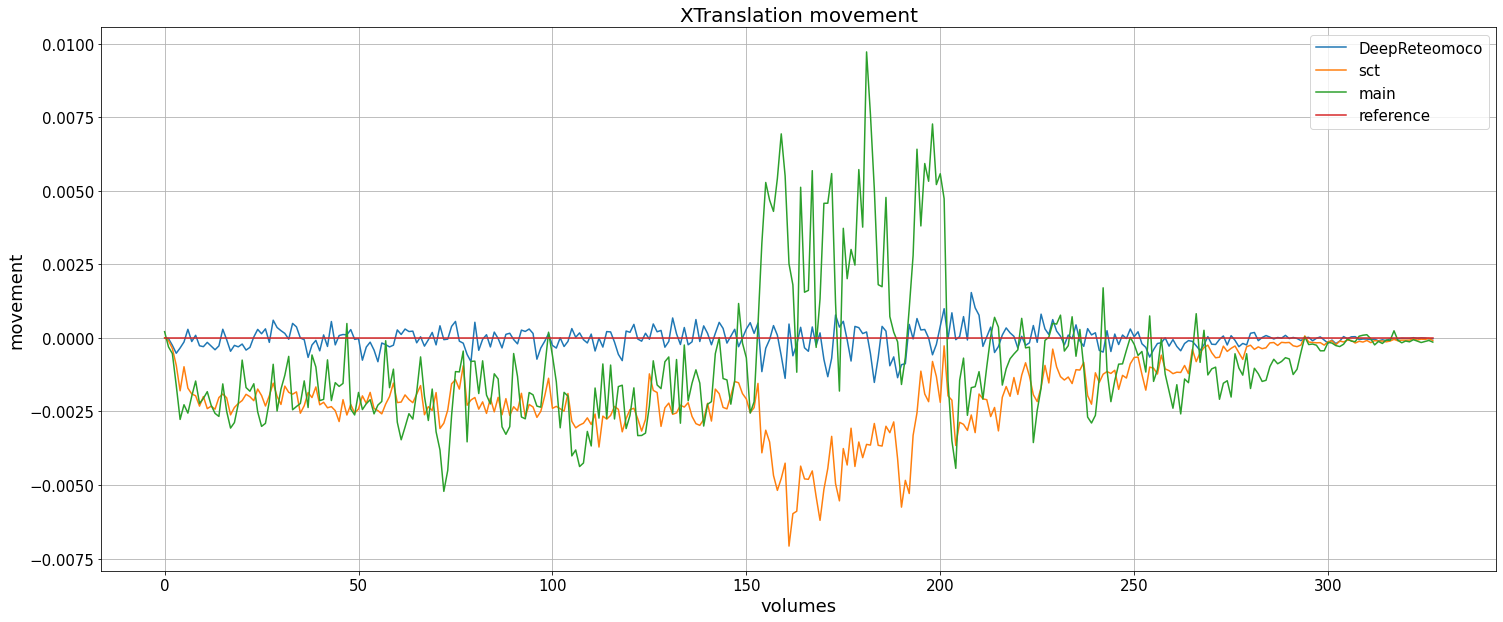

In [45]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_tx,label = 'DeepReteomoco')
plt.plot(volume,value_sct_tx,label = 'sct')
plt.plot(volume,value_main_tx,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('XTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot

plt.legend()
plt.grid()
plt.legend(fontsize=15)


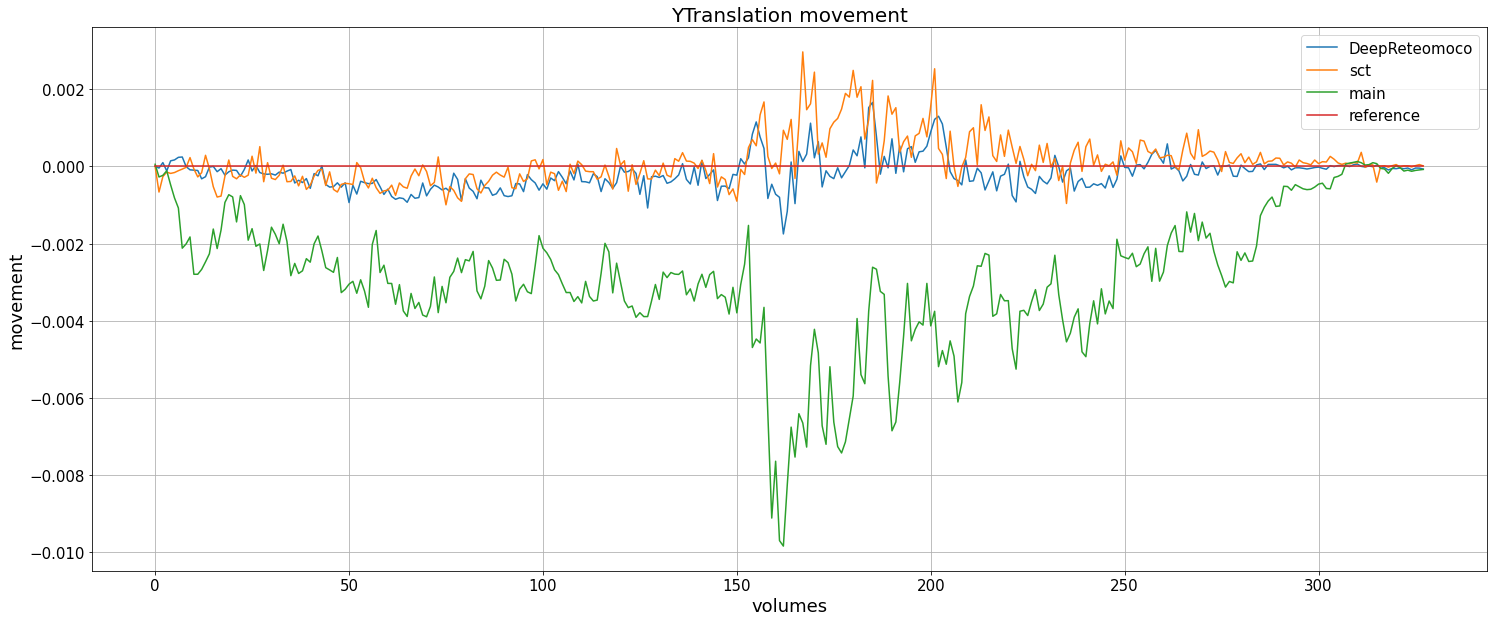

In [46]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_ty,label = 'DeepReteomoco')
plt.plot(volume,value_sct_ty,label = 'sct')
plt.plot(volume,value_main_ty,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('YTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

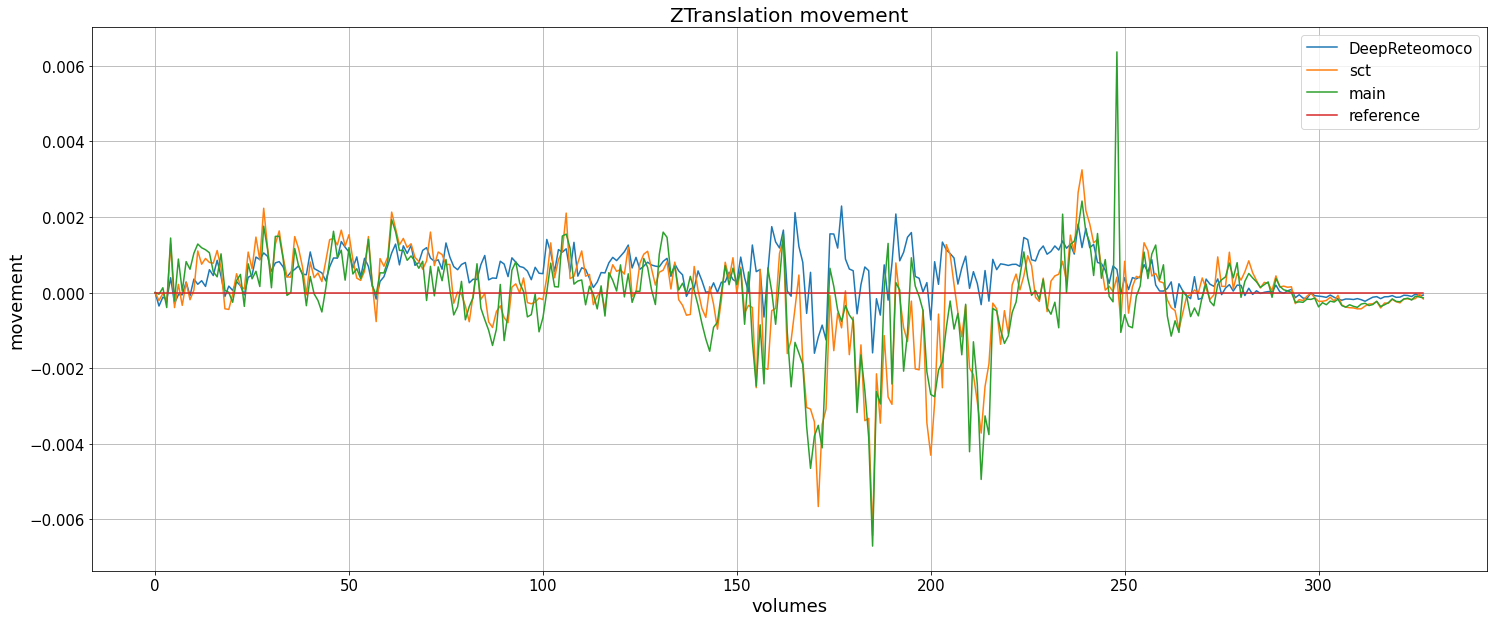

In [47]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_tz,label = 'DeepReteomoco')
plt.plot(volume,value_sct_tz,label = 'sct')
plt.plot(volume,value_main_tz,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('ZTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

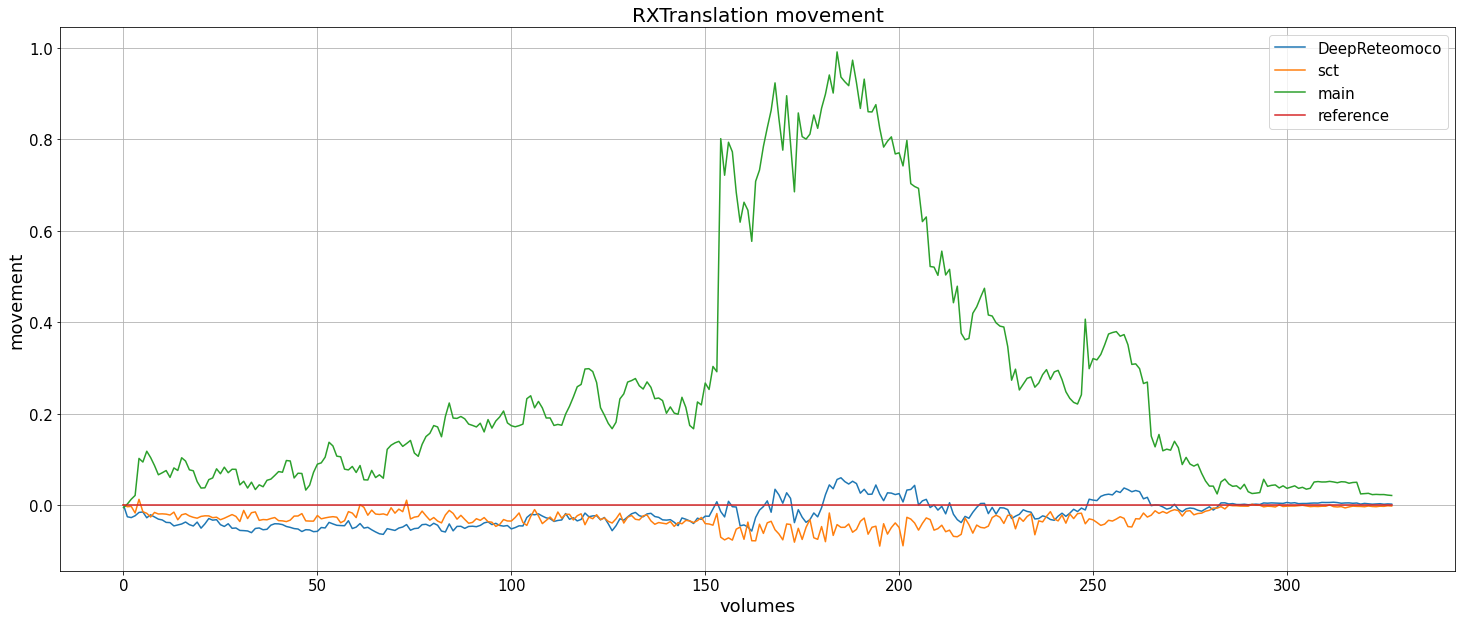

In [48]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_rx,label = 'DeepReteomoco')
plt.plot(volume,value_sct_rx,label = 'sct')
plt.plot(volume,value_main_rx,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('RXTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

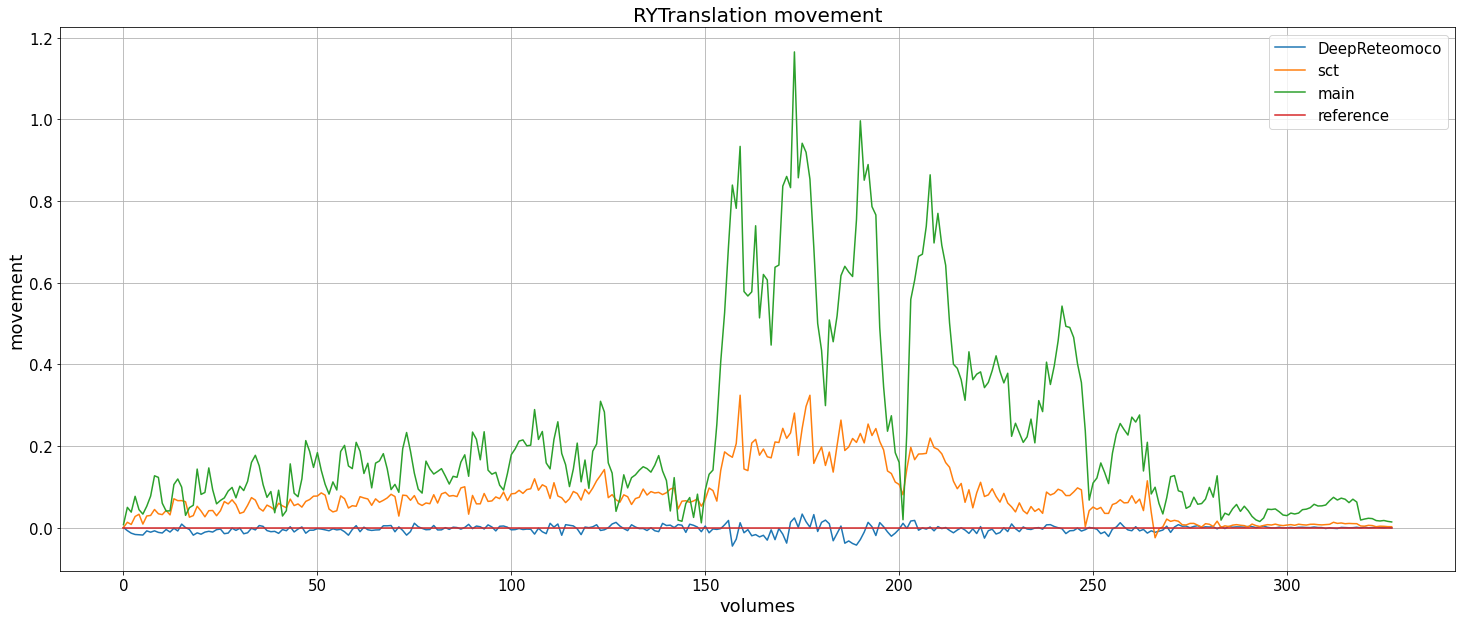

In [49]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_ry,label = 'DeepReteomoco')
plt.plot(volume,value_sct_ry,label = 'sct')
plt.plot(volume,value_main_ry,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('RYTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

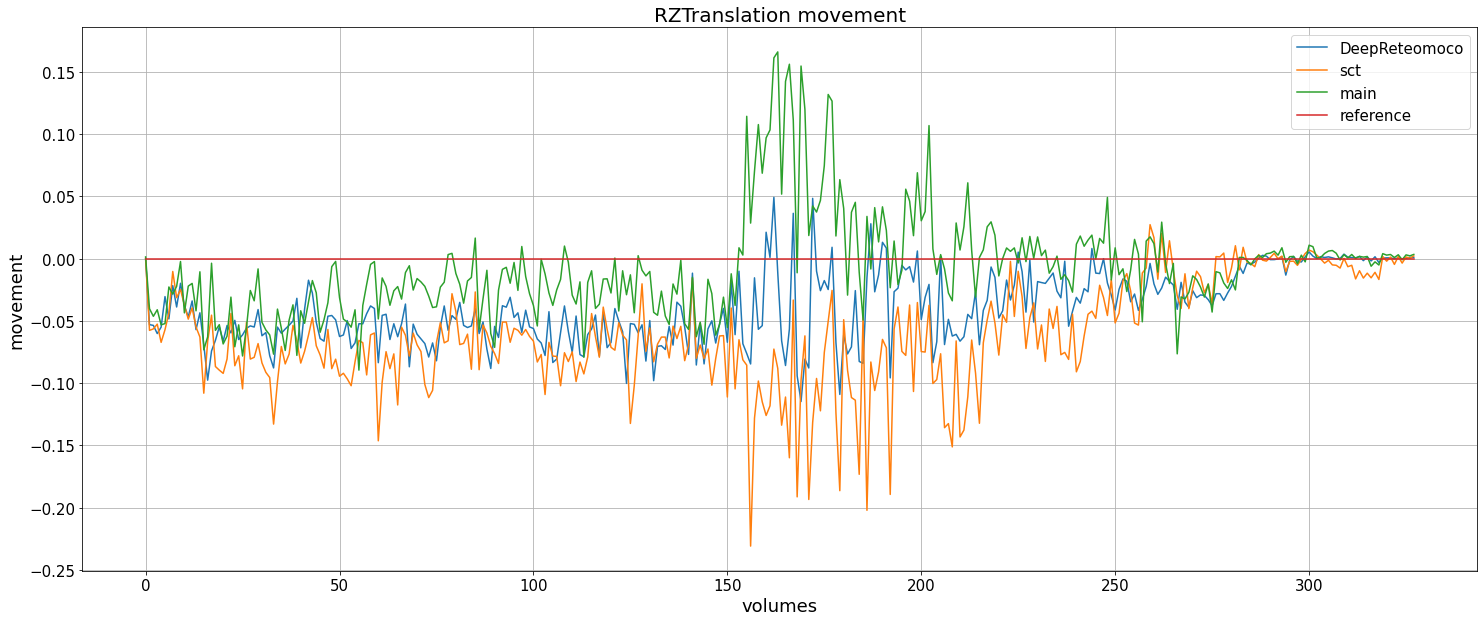

In [50]:
volume=range(int(np.max(o[:,0]))) 
line=np.zeros(int(np.max(o[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_rz,label = 'DeepReteomoco')
plt.plot(volume,value_sct_rz,label = 'sct')
plt.plot(volume,value_main_rz,label = 'main')

plt.plot(volume,line,label = 'reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('RZTranslation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

In [11]:
from sklearn.metrics import mean_squared_error
  
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_xtranlation=',mean_squared_error(Y_true,value_net_tx))
print('sct_MSE_xtranlation=',mean_squared_error(Y_true,value_sct_tx))
print('main_MSE_xtranlation=',mean_squared_error(Y_true,value_main_tx))

net_MSE_xtranlation= 1.419533280159341e-07
sct_MSE_xtranlation= 5.545951930075583e-06
main_MSE_xtranlation= 5.615384767510706e-06


In [21]:
Y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [12]:
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_ytranlation=',mean_squared_error(Y_true,value_net_ty))
print('sct_MSE_ytranlation=',mean_squared_error(Y_true,value_sct_ty))
print('main_MSE_ytranlation=',mean_squared_error(Y_true,value_main_ty))

net_MSE_ytranlation= 2.0616126174038984e-07
sct_MSE_ytranlation= 3.911943213745086e-07
main_MSE_ytranlation= 1.1513210631499138e-05


In [13]:
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_ztranlation=',mean_squared_error(Y_true,value_net_tz))
print('sct_MSE_ztranlation=',mean_squared_error(Y_true,value_sct_tz))
print('main_MSE_ztranlation=',mean_squared_error(Y_true,value_main_tz))

net_MSE_ztranlation= 5.438032926429343e-07
sct_MSE_ztranlation= 1.4756509179873845e-06
main_MSE_ztranlation= 1.554607645635868e-06


In [14]:
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_rxrotation=',mean_squared_error(Y_true,value_net_rx))
print('sct_MSE_rxrotation=',mean_squared_error(Y_true,value_sct_rx))
print('main_MSE_rxrotation=',mean_squared_error(Y_true,value_main_rx))

net_MSE_rxrotation= 0.001045842114104372
sct_MSE_rxrotation= 0.0012022592818734796
main_MSE_rxrotation= 0.14358036298791815


In [15]:
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_ryrotation=',mean_squared_error(Y_true,value_net_ry))
print('sct_MSE_ryrotation=',mean_squared_error(Y_true,value_sct_ry))
print('main_MSE_ryrotation=',mean_squared_error(Y_true,value_main_ry))

net_MSE_ryrotation= 0.00011704808901559662
sct_MSE_ryrotation= 0.01036624381870108
main_MSE_ryrotation= 0.10734144295361298


In [16]:
# Given values
Y_true =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_rzrotation=',mean_squared_error(Y_true,value_net_rz))
print('sct_MSE_rzrotation=',mean_squared_error(Y_true,value_sct_rz))
print('main_MSE_rzrotation=',mean_squared_error(Y_true,value_main_rz))

net_MSE_rzrotation= 0.0023450146967623027
sct_MSE_rzrotation= 0.0054261841192322765
main_MSE_rzrotation= 0.0017258958963475926
